In [40]:
text_path = "data/neko.txt"
mecab_path = "data/neko.txt.mecab"
import MeCab
import pprint
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
!mecab < $text_path > $mecab_path

### 30. 形態素解析結果の読み込み

In [3]:
# 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
def parseMecab(block):
    lst = []
    for line in block.split('\n'):
        if line == '':
            return lst
        (surface, attr) = line.split('\t')
        attr = attr.split(',')
        dct = {
            'surface': surface,
            'base': attr[6],
            'pos': attr[0],
            'pos1': attr[1]
        }
        lst.append(dct)

In [4]:
with open(mecab_path, mode='rt', encoding='utf-8') as f:
    blockList = f.read().split('EOS\n')
blockList = list(filter(lambda x: x != '', blockList))
blockList = [parseMecab(block) for block in blockList]
print(blockList[100])

[{'surface': 'ことに', 'base': 'ことに', 'pos': '副詞', 'pos1': '一般'}, {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'が', 'base': 'が', 'pos': '助詞', 'pos1': '格助詞'}, {'surface': '時々', 'base': '時々', 'pos': '副詞', 'pos1': '一般'}, {'surface': '同衾', 'base': '同衾', 'pos': '名詞', 'pos1': 'サ変接続'}, {'surface': 'する', 'base': 'する', 'pos': '動詞', 'pos1': '自立'}, {'surface': '小', 'base': '小', 'pos': '接頭詞', 'pos1': '名詞接続'}, {'surface': '供', 'base': '供', 'pos': '名詞', 'pos1': 'サ変接続'}, {'surface': 'の', 'base': 'の', 'pos': '助詞', 'pos1': '連体化'}, {'surface': 'ご', 'base': 'ご', 'pos': '接頭詞', 'pos1': '名詞接続'}, {'surface': 'とき', 'base': 'とき', 'pos': '名詞', 'pos1': '非自立'}, {'surface': 'に', 'base': 'に', 'pos': '助詞', 'pos1': '格助詞'}, {'surface': '至っ', 'base': '至る', 'pos': '動詞', 'pos1': '自立'}, {'surface': 'て', 'base': 'て', 'pos': '助詞', 'pos1': '接続助詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '言語', 'base': '言語', 'pos': '名詞', 'pos1': '一般'}, {'surface': '同断', 'base': '同断', 'po

### 31. 動詞

In [5]:
verb_surface = [line['surface']
                for block in blockList
                for line in block if line['pos'] == '動詞']

### 32. 動詞の原形

In [6]:
verb_base = [line['base']
                for block in blockList
                for line in block if line['pos'] == '動詞']

### 33. 「AのB」

In [7]:
no = []
for block in blockList:
    for i in range(1, len(block) -1):
        if block[i-1]['pos'] == '名詞' and block[i]['surface'] == 'の' and block[i+1]['pos'] == '名詞':
                no.append(block[i-1]['surface'] + block[i]['surface'] + block[i+2]['surface'])

### 34. 名詞の連接

In [8]:
norn = []
for block in blockList:
    count = 0
    tmp = []
    for line in block:
        if line['pos'] == '名詞':
            tmp.append(line['surface'])
            count += 1
        else:
            if count > 1:
                norn.append(tmp)
            tmp = []
            count = 0

### 35. 単語の出現頻度

In [9]:
wordList = [f"{line['surface']}_{line['pos']}" for block in blockList for line in block]
c = Counter(wordList)
print(c.most_common(100))

[('の_助詞', 7583), ('。_記号', 7486), ('て_助詞', 6848), ('、_記号', 6772), ('は_助詞', 6420), ('に_助詞', 6243), ('を_助詞', 6071), ('と_助詞', 5505), ('が_助詞', 5334), ('た_助動詞', 3987), ('「_記号', 3231), ('」_記号', 3225), ('も_助詞', 2479), ('だ_助動詞', 2363), ('し_動詞', 2259), ('で_助詞', 2069), ('から_助詞', 2031), ('で_助動詞', 1719), ('ない_助動詞', 1625), ('の_名詞', 1611), ('か_助詞', 1529), ('な_助動詞', 1289), ('いる_動詞', 1249), ('事_名詞', 1207), ('へ_助詞', 1031), ('ある_助動詞', 995), ('する_動詞', 992), ('もの_名詞', 981), ('う_助動詞', 980), ('君_名詞', 973), ('です_助動詞', 973), ('云う_動詞', 937), ('主人_名詞', 932), ('ん_助動詞', 850), ('ない_形容詞', 765), ('ん_名詞', 704), ('ある_動詞', 700), ('よう_名詞', 696), ('ね_助詞', 657), ('この_連体詞', 649), ('御_接頭詞', 636), ('人_名詞', 602), ('ば_助詞', 584), ('その_連体詞', 576), ('一_名詞', 554), ('何_名詞', 539), ('よ_助詞', 501), ('吾輩_名詞', 481), ('い_動詞', 470), ('ます_助動詞', 458), ('…_記号', 433), ('じゃ_助詞', 418), ('これ_名詞', 414), ('なる_動詞', 414), ('\u3000_記号', 411), ('なっ_動詞', 404), ('それ_名詞', 381), ('来_動詞', 360), ('見_動詞', 350), ('時_名詞', 345), ('迷亭_名詞', 343), ('でも_助詞', 337), ('

### 36. 頻度上位10語

<BarContainer object of 10 artists>

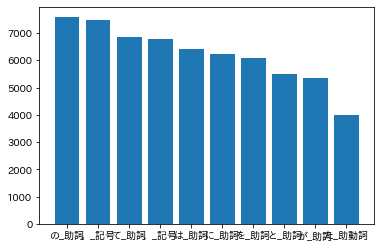

In [23]:
target = list(zip(*c.most_common(10)))
plt.bar(*target)

### 37. 「猫」と共起頻度の高い上位10語

<BarContainer object of 10 artists>

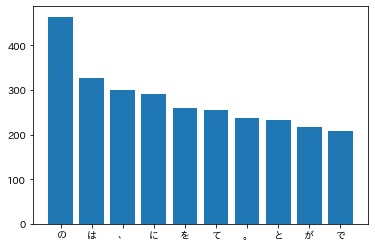

In [30]:
cat_sentences = [block for block in blockList for line in block if line['surface'] == '猫']
with_cat = [line['surface'] for sentence in cat_sentences for line in sentence if line['surface'] != '猫']
c = Counter(with_cat)
target = list(zip(*c.most_common(10)))
plt.bar(*target)

### 38. ヒストグラム

(array([6447., 2357., 1157.,  722.,  546.,  373.,  288.,  251.,  175.,
         138.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

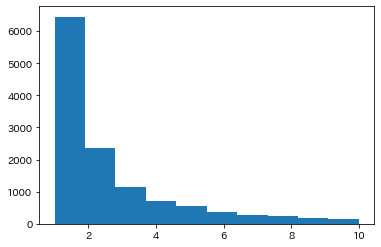

In [34]:
c = Counter(wordList)
plt.hist(c.values(), range= (1,10))

### 39. Zipfの法則

<ipython-input-65-c8e55e7f9c4e>:4: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(range(len(v))),np.log(v))


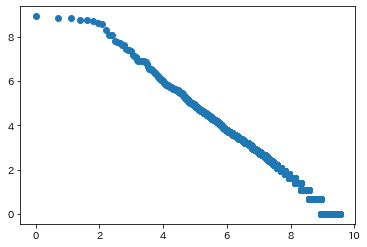

In [65]:
c = Counter(wordList)
v = [kv[1] for kv in c.most_common()]

plt.scatter(np.log(range(len(v))),np.log(v))